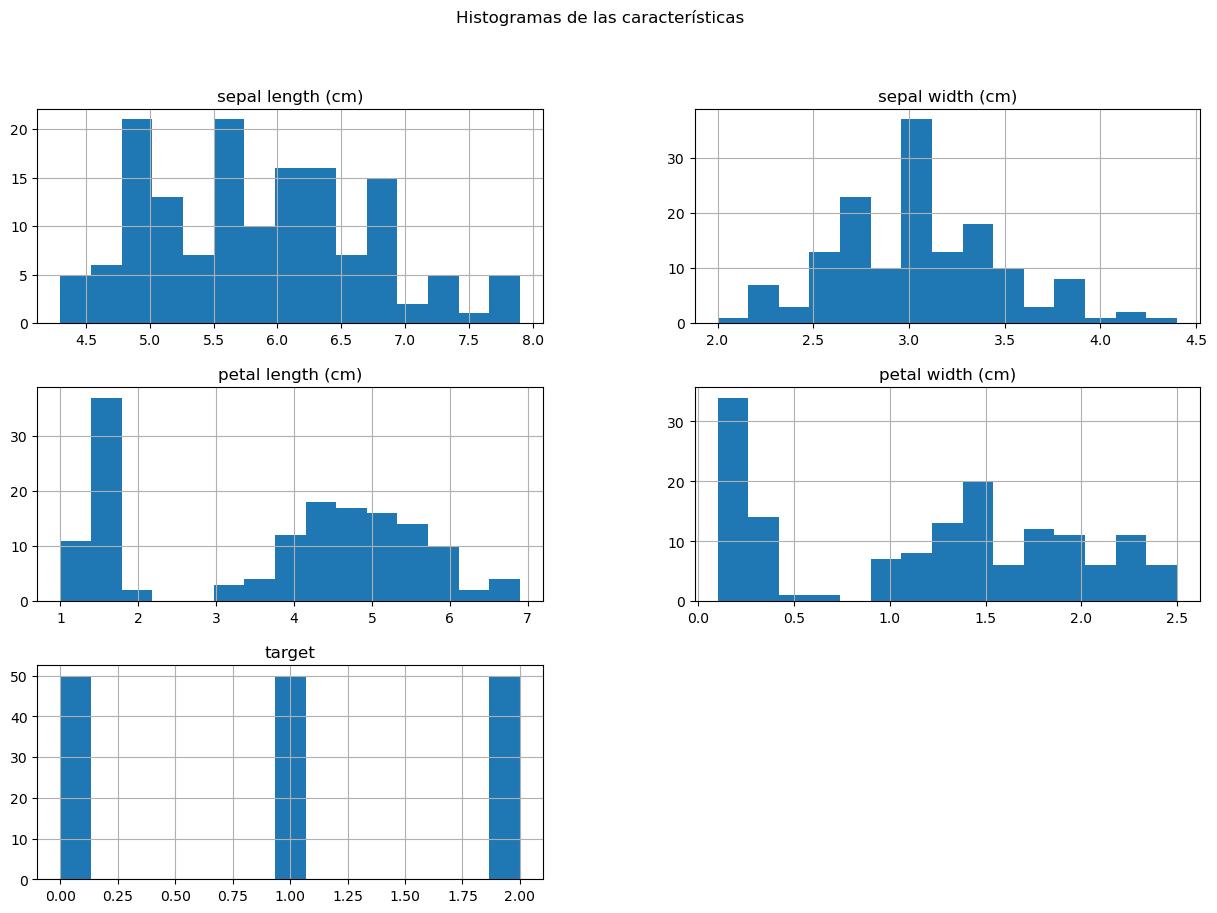

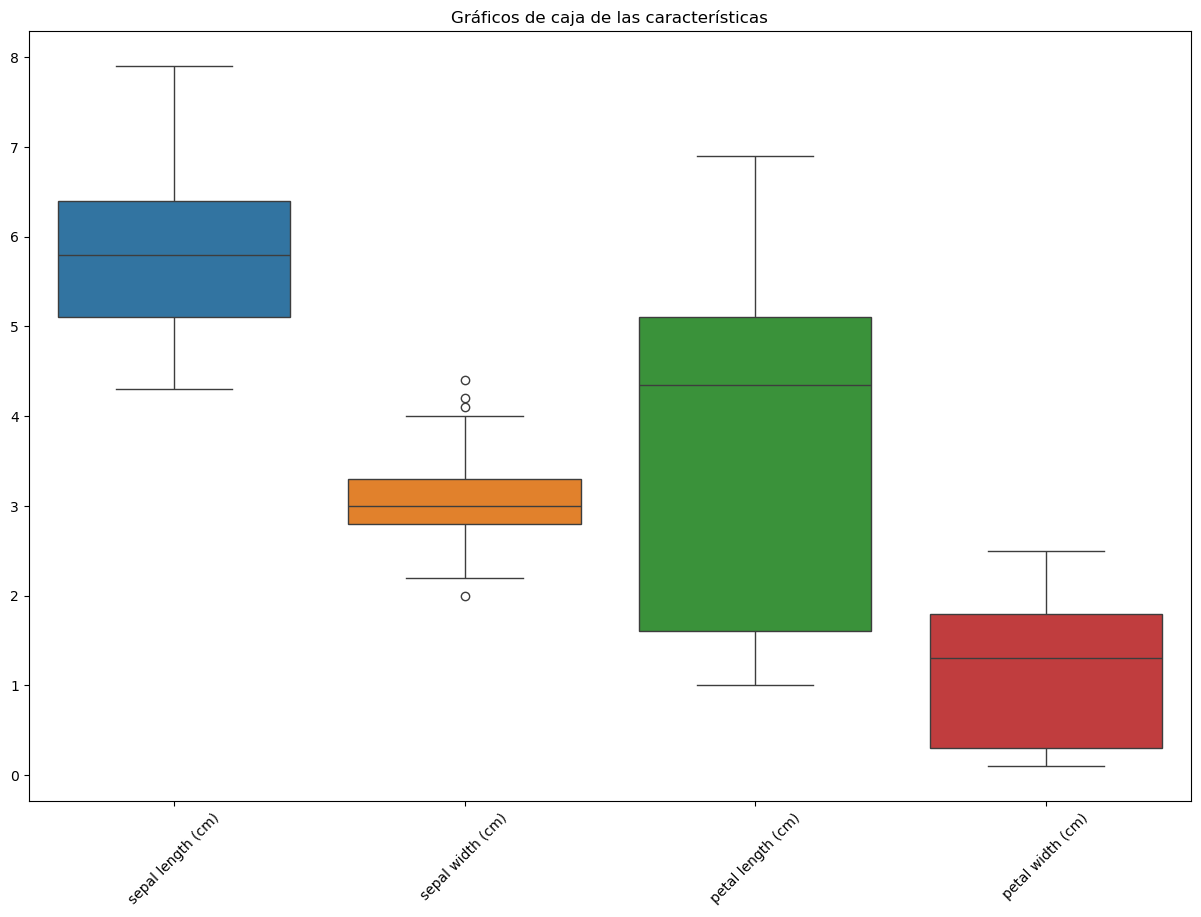

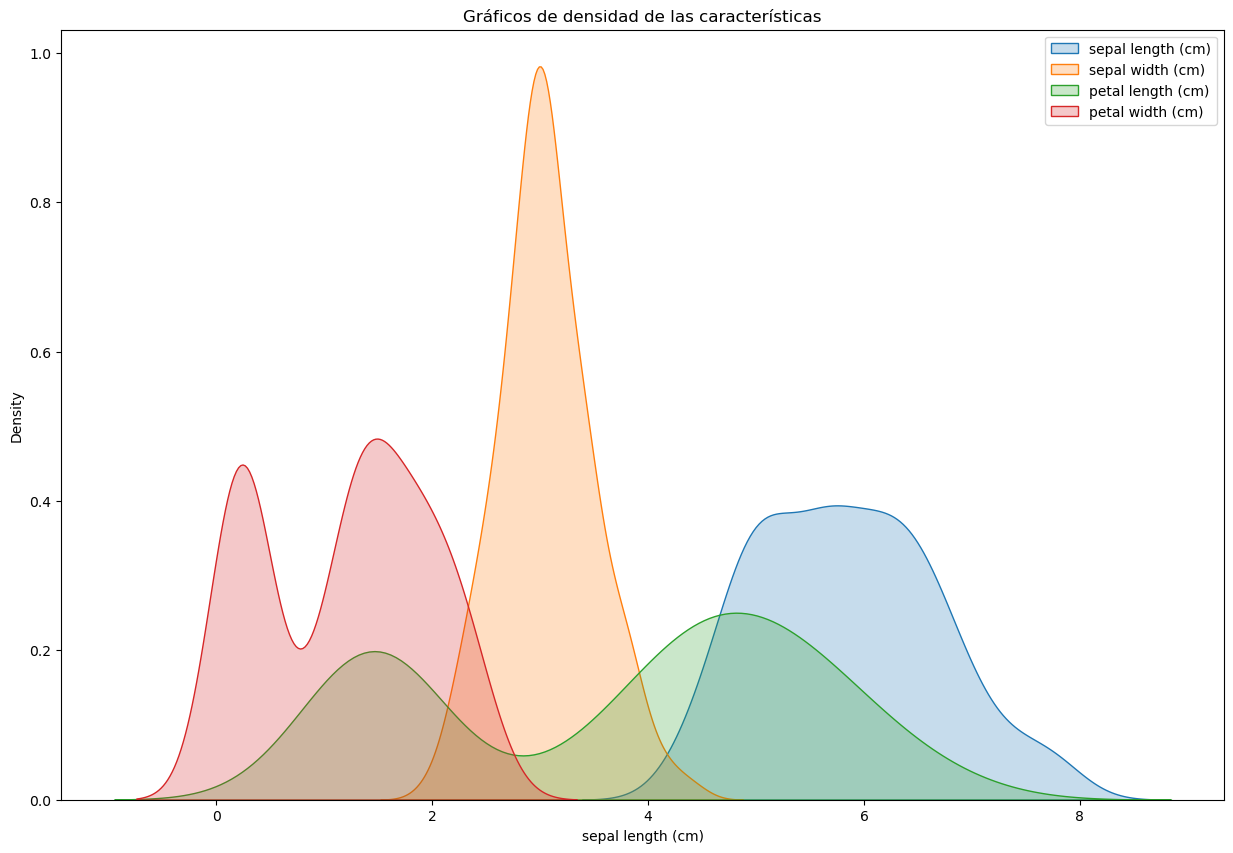

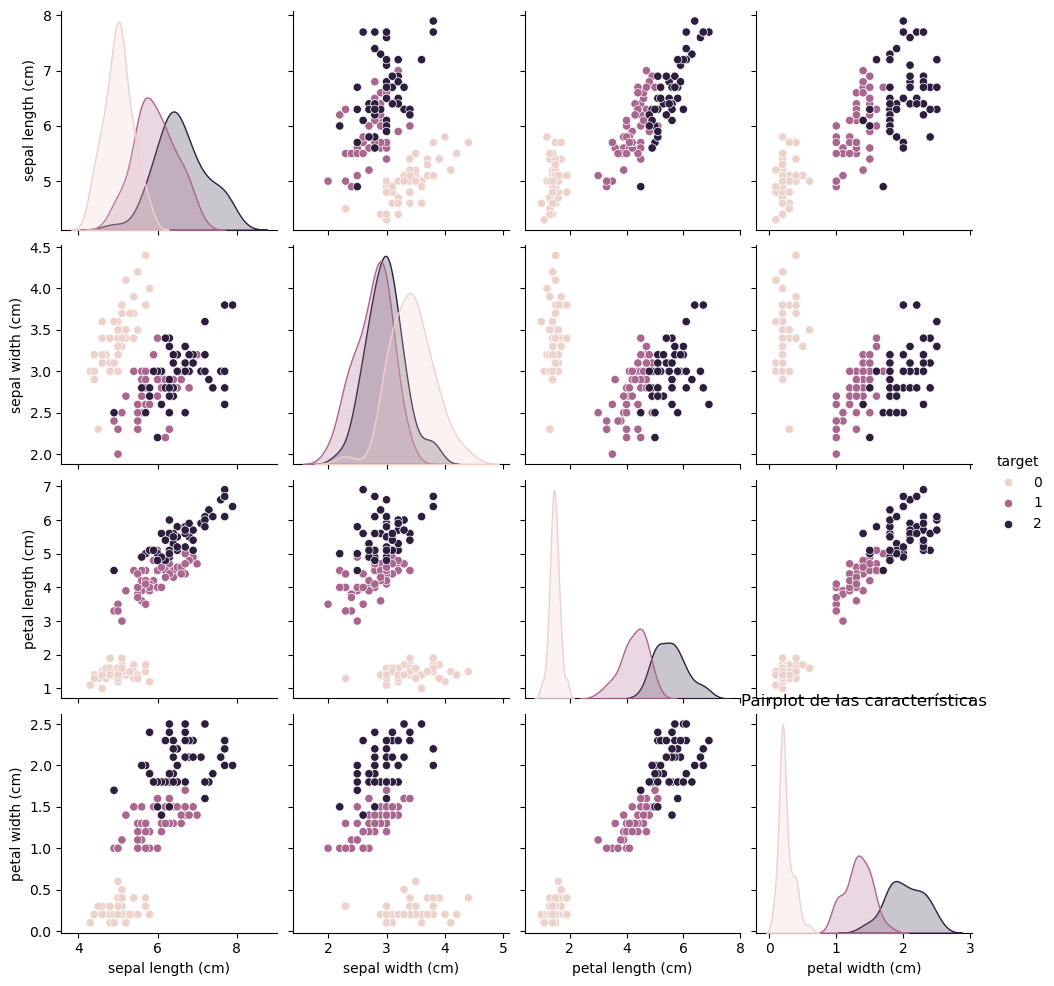

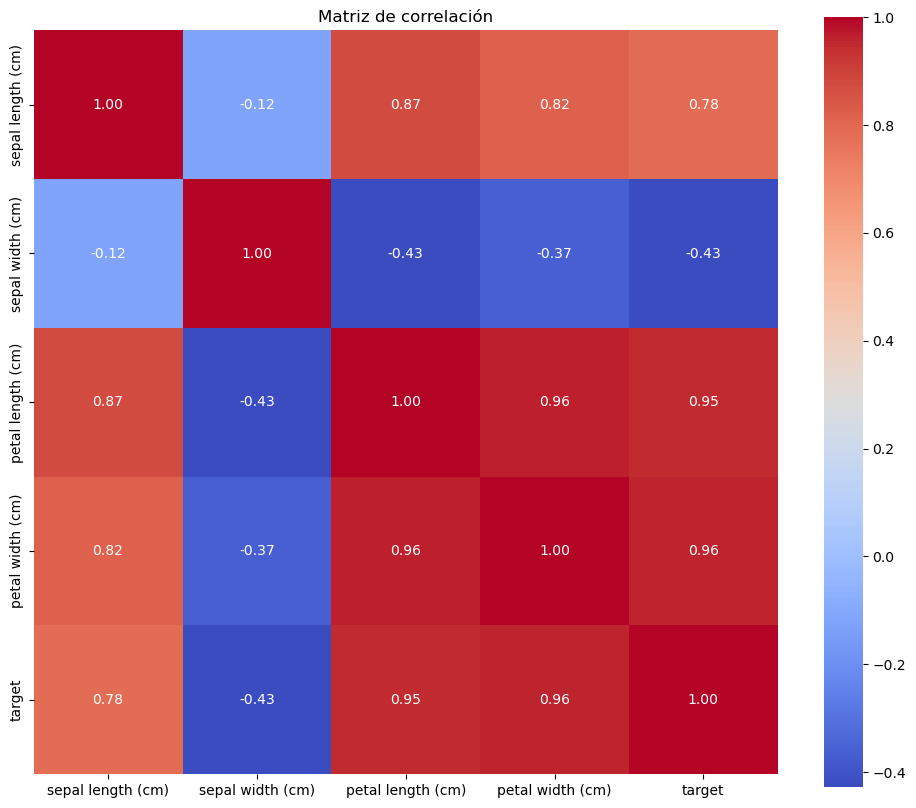

Precisión promedio con validación cruzada: 0.95

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convertir a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Análisis exploratorio de datos (EDA)
# Histogramas
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogramas de las características')
plt.show()

# Gráficos de caja
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop('target', axis=1))
plt.title('Gráficos de caja de las características')
plt.xticks(rotation=45)
plt.show()

# Gráficos de densidad
plt.figure(figsize=(15, 10))
for feature in feature_names:
    sns.kdeplot(df[feature], label=feature, fill=True)
plt.title('Gráficos de densidad de las características')
plt.legend()
plt.show()

# Pairplot
sns.pairplot(df, hue='target')
plt.title('Pairplot de las características')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación')
plt.show()

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Algoritmo de Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Precisión promedio con validación cruzada: {np.mean(cv_scores):.2f}')

# Predicciones y métricas de clasificación
y_pred = model.predict(X_test)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


# Optimizando NaiveBayes

1. Carga de datos y Análisis Exploratorio (EDA).
2. Búsqueda de hiperparámetros con GridSearchCV para optimizar el modelo.
3. Entrenamiento del modelo final con los mejores parámetros.
4. Evaluación del rendimiento del modelo.
5. Guardado del modelo entrenado y del escalador para uso futuro.
6. Ejemplo de cómo cargar el modelo y hacer predicciones sobre nuevos datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Librería para guardar y cargar modelos

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# --- 1. Carga y Análisis Exploratorio de Datos (EDA) ---
def perform_eda(df):
    """Realiza y muestra visualizaciones del Análisis Exploratorio de Datos."""
    print("--- Realizando Análisis Exploratorio de Datos (EDA) ---")

    # Pairplot para ver relaciones y separabilidad de clases
    sns.pairplot(df, hue='target', palette='viridis')
    plt.suptitle('Pairplot de Características por Clase', y=1.02)
    plt.show()

    # Matriz de correlación para entender la relación lineal entre características
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.drop('target', axis=1).corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Matriz de Correlación de Características')
    plt.show()

--- Realizando Análisis Exploratorio de Datos (EDA) ---


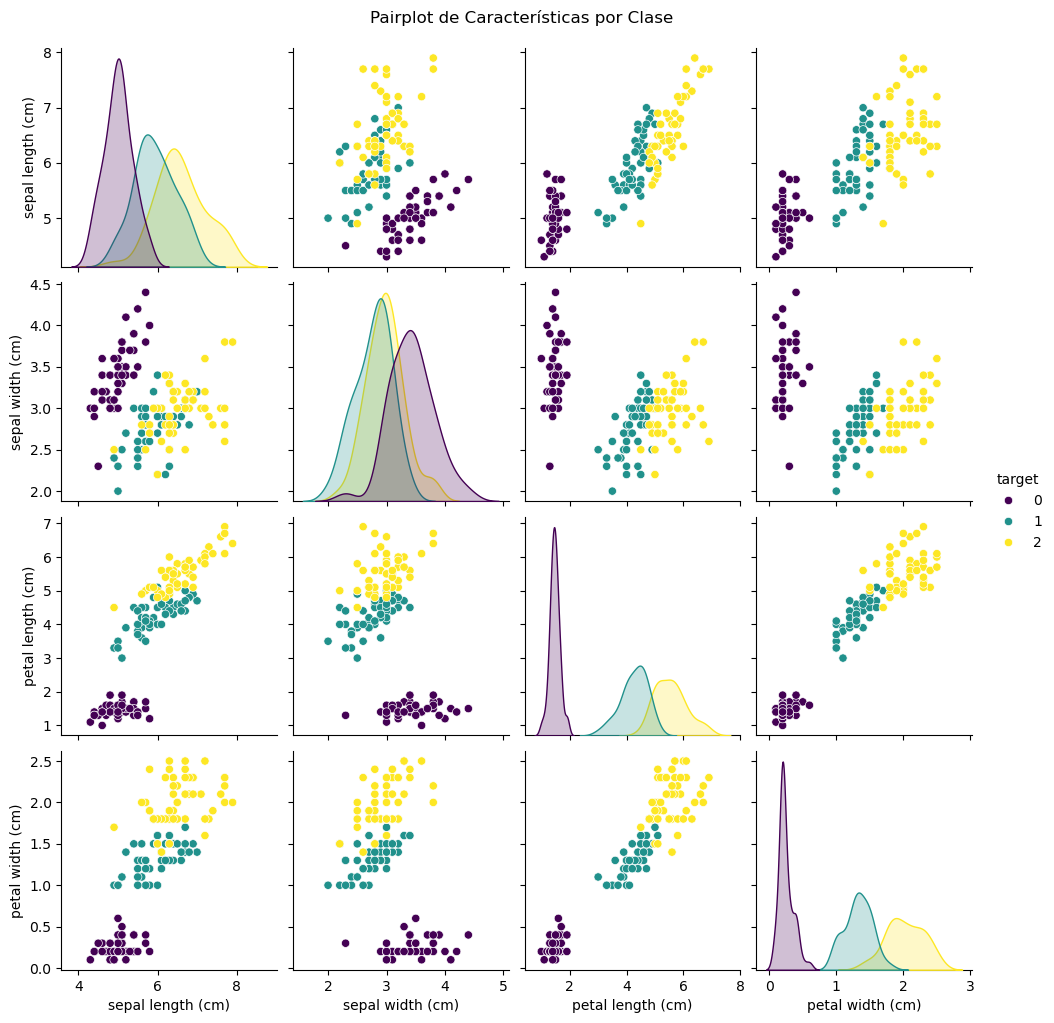

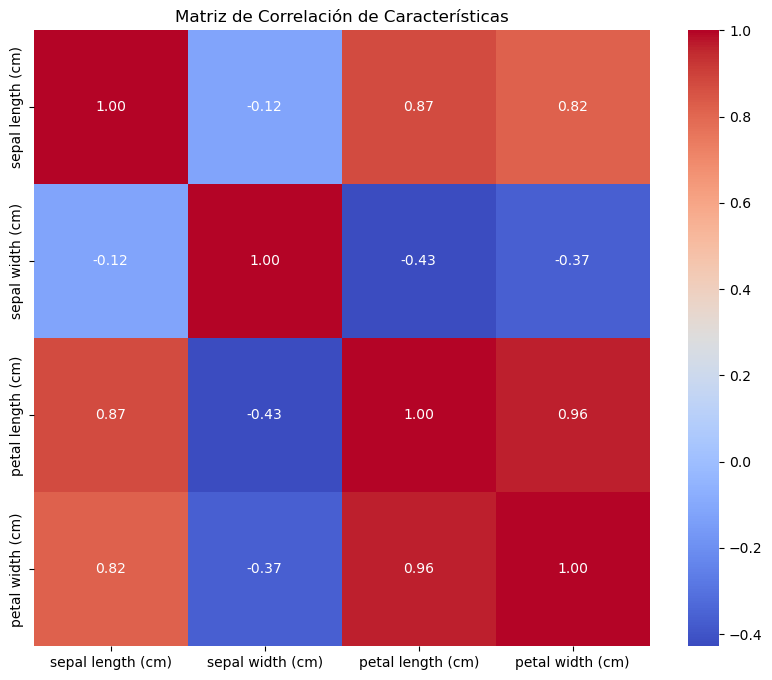

In [4]:
# --- 2. Carga de datos ---
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convertir a DataFrame para el EDA
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Ejecutar el EDA
perform_eda(df)

In [5]:
# --- 3. División de Datos ---
# No es necesario escalar los datos para Gaussian Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nDatos divididos en {len(X_train)} muestras de entrenamiento y {len(X_test)} de prueba.")


Datos divididos en 105 muestras de entrenamiento y 45 de prueba.


In [6]:
# --- 4. Optimización de Hiperparámetros con GridSearchCV ---
print("\n--- Buscando los mejores hiperparámetros para GaussianNB ---")
# Es una porción de la varianza más grande que se agrega a las varianzas para la estabilidad del cálculo.
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100) # Probamos 100 valores entre 1 y 1e-9
}

# n_jobs=-1 usa todos los núcleos de CPU disponibles para acelerar la búsqueda
nb_model = GaussianNB()
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)

# Entrenamos el GridSearch para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros encontrados
print(f"\nMejor hiperparámetro encontrado: {grid_search.best_params_}")
print(f"Mejor puntuación de accuracy (cross-validation): {grid_search.best_score_:.4f}")


--- Buscando los mejores hiperparámetros para GaussianNB ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Mejor hiperparámetro encontrado: {'var_smoothing': 0.0012328467394420659}
Mejor puntuación de accuracy (cross-validation): 0.9810


In [7]:
# --- 5. Entrenamiento y Evaluación del Modelo Final ---
print("\n--- Entrenando y evaluando el modelo final con los mejores parámetros ---")

# El mejor modelo ya está entrenado en `grid_search.best_estimator_`
best_model = grid_search.best_estimator_

# Realizamos predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluamos el rendimiento
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\nAccuracy en el conjunto de prueba: {accuracy:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nInforme de Clasificación:")
print(class_report)


--- Entrenando y evaluando el modelo final con los mejores parámetros ---

Accuracy en el conjunto de prueba: 0.9111

Matriz de Confusión:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

Informe de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [8]:
# --- 6. Guardado del Modelo ---
print("\n--- Guardando el modelo entrenado ---")
model_filename = './Modelo/best_model_nb.joblib'
joblib.dump(best_model, model_filename)
print(f"Modelo guardado exitosamente en el archivo: '{model_filename}'")


--- Guardando el modelo entrenado ---
Modelo guardado exitosamente en el archivo: './Modelo/best_model_nb.joblib'


In [9]:
# Supongamos que tenemos una nueva flor con estas características:
# [largo sépalo, ancho sépalo, largo pétalo, ancho pétalo]
new_flower_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Se espera que sea Setosa (clase 0)
                            [6.7, 3.0, 5.2, 2.3],  # Se espera que sea Virginica (clase 2)
                            [5.9, 3.0, 4.2, 1.5]]) # Se espera que sea Versicolor (clase 1)

In [10]:
def predecir_flor(model, new_data):
    """Realiza predicciones sobre nuevas muestras de flores."""
    model= joblib.load(model_filename)  # Cargar el modelo guardado
    predictions = model.predict(new_data) # Realizar predicciones
    
    for flor, prediccion in enumerate(predictions):
        print(f"Para la flor {flor + 1}: {target_names[prediccion]} (Clase {prediccion})")
        
    # Usamos el modelo cargado para predecir la clase de la nueva flor
    predicted_class_indices = model.predict(new_data)
    predicted_class_names= target_names[predicted_class_indices]
    
    resultado = {} # Diccionario para almacenar los resultados
    print("\nPredicciones para las nuevas flores:")
    for i, flor in enumerate(new_data):
        resultado['Datos de la flor'] = flor
        resultado['Predicción'] = f'{predicted_class_names[i]} (Clase {predicted_class_indices[i]})'
    return resultado        

In [11]:
predecir_flor(model_filename, new_flower_data)

Para la flor 1: setosa (Clase 0)
Para la flor 2: virginica (Clase 2)
Para la flor 3: versicolor (Clase 1)

Predicciones para las nuevas flores:


{'Datos de la flor': array([5.9, 3. , 4.2, 1.5]),
 'Predicción': 'versicolor (Clase 1)'}